In [4]:
import cv2
import matplotlib.pyplot as plt

In [3]:
source = "../race_car.mp4"  # source = 0 for webcams

video_cap = cv2.VideoCapture(source)
if video_cap.isOpened() == False:
    print("Error opening video stream or file")

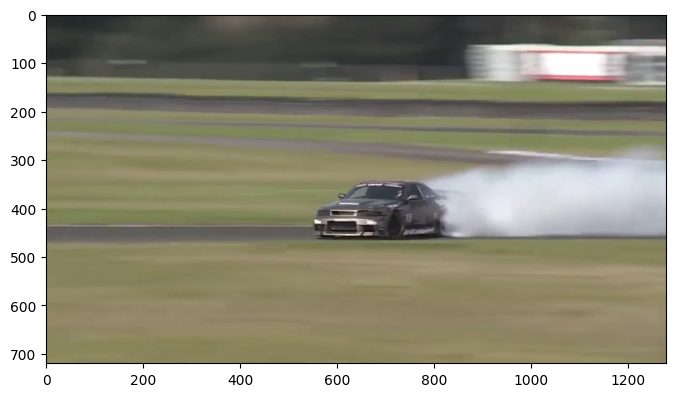

In [9]:
# Read just one frame of the video file
has_frame, frame = video_cap.read()

plt.figure(figsize=(8, 6))
plt.imshow(frame[:, :, ::-1]);

### How to write videos?

We need to use the VideoWriter class in OpenCV, this class takes four required arguments:

1. filename: Name of th output video file
2. fourcc: Specification that describes the compression and format of the video file
3. fps: FPS at which we want to write the video at
4. frameSize: Width and the height (needs to match the size of the video frames we have in memory)

In [12]:
# Retireve video frame properties.
frame_w = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_fps = int(video_cap.get(cv2.CAP_PROP_FPS))

# Specify the value for fourcc
fourcc_avi = cv2.VideoWriter_fourcc("M", "J", "P", "G")
fourcc_mp4 = cv2.VideoWriter_fourcc(*"XVID")

# Specify the video output filenames.
file_out_avi = "video_out.avi"
file_out_mp4 = "video_out.mp4"

# Slow down the speed of the video.
frame_fps = int(frame_fps / 3)

# Create the video writer objects.
out_avi = cv2.VideoWriter(file_out_avi, fourcc_avi, frame_fps, (frame_w, frame_h))
out_mp4 = cv2.VideoWriter(file_out_mp4, fourcc_mp4, frame_fps, (frame_w, frame_h))

In [13]:
def drawBannerText(frame, text, banner_height_percent=0.05, text_color=(0, 255, 0)):
    banner_height = int(banner_height_percent * frame.shape[0])
    cv2.rectangle(frame, (0, 0), (frame.shape[1], banner_height), (0, 0, 0), thickness=-1)
    
    # Draw tet on banner.
    left_offset = 20
    location = (left_offset, int(5 + (banner_height * frame.shape[0]) / 2))
    fontScale = 1.5
    fontThickness = 2
    cv2.putText(frame, text, location, cv2.FONT_HERSHEY_PLAIN, fontScale, text_color, fontThickness, cv2.LINE_AA)

In [14]:
# Read all the frames in the video.
frame_count = 0
while True:
    
    # Read one frame at a time.
    ok, frame = video_cap.read()
    if not ok:
        break
    
    # Increment the frame count for the annotation.
    frame_count += 1
    
    # Annotate each video frame.
    drawBannerText(frame, "Frame: " + str(int(frame_count)) + " FPS: " + str(int(frame_fps)))
    
    # Write the frame to the output files.
    out_avi.write(frame)
    out_mp4.write(frame)

In [19]:
# Release the video capture and video writer objects
video_cap.release()
out_avi.release()
out_mp4.release()